# Loan Eligibility Prediction using Pandas - Case Study

## Objective
The aim of this case study is to analyze customer data and build a basic real-time loan eligibility prediction logic using Python and Pandas. The dataset includes features such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and more. I'll walk through data processing, cleaning, analysis, and finally generate an eligibility flag

---

## 1. Import Required Libraries
We begin by importing the necessary Python libraries for data analysis and visualization.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('whitegrid')

---

## 2. Load the Dataset
Load the dataset into a Pandas DataFrame. If you're using Colab, ensure you've uploaded the CSV file.

In [6]:
df = pd.read_csv("LoanData.csv")

---

## 3. Preview the Data
Display the first few rows to understand the structure.

In [8]:
print("First 5 Rows:")
df.head()

First 5 Rows:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


---

## 4. Display Column Names
Check the feature names for further analysis.

In [9]:
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [25]:
print("Number of columns:", df.shape[1])
print("Number of observations (rows):", df.shape[0])
print("Index info:", df.index)

Number of columns: 16
Number of observations (rows): 614
Index info: RangeIndex(start=0, stop=614, step=1)


---

## 5. Summary of the DataFrame
This gives an overview of columns, datatypes, and non-null counts.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


---

## 6. Descriptive Statistical Measures
Summarize central tendency, dispersion, and shape of numerical columns.

In [11]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002990,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


---

## 7. Handling Missing Values
We identify and clean missing values by using mode (for categorical) and median (for numerical).

In [12]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


# Filling missing values

In [13]:
def fill_missing(col):
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

for column in df.columns:
    fill_missing(column)

df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


---

## 8. Sort DataFrame by Applicant Income
We can sort data to find high-income applicants.

In [14]:
df.sort_values(by='ApplicantIncome', ascending=False).head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
333,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y
171,LP001585,Male,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
443,LP002422,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y
183,LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
126,LP001448,Male,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
506,LP002624,Male,Yes,0,Graduate,No,20833,6667.0,480.0,360.0,1.0,Urban,Y
284,LP001922,Male,Yes,0,Graduate,No,20667,0.0,128.0,360.0,1.0,Rural,N


---

## 9. Apply Function and Lambda
We calculate total income by combining applicant and co-applicant incomes.

# New column: TotalIncome

In [15]:
df['TotalIncome'] = df.apply(lambda row: row['ApplicantIncome'] + row['CoapplicantIncome'], axis=1)

# Encode Loan_Status

In [16]:
df['Loan_Status_Binary'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

---

## 10. Data Visualization
Let's visualize the loan approval distribution and analyze LoanAmount by Education status.

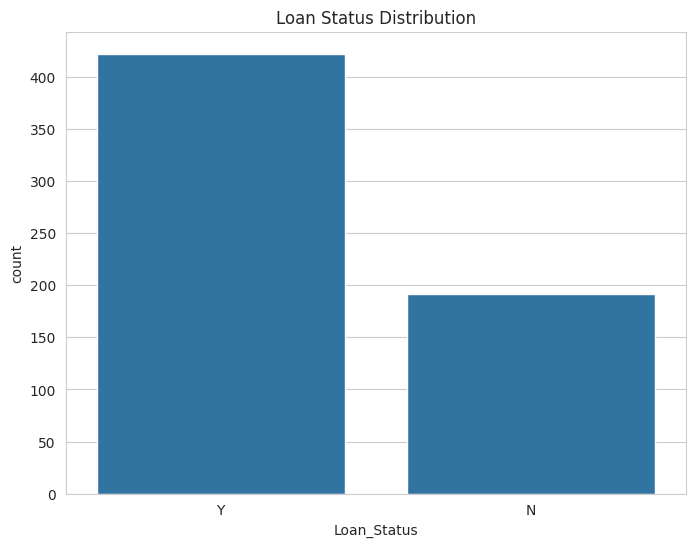

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Status Distribution")
plt.show()

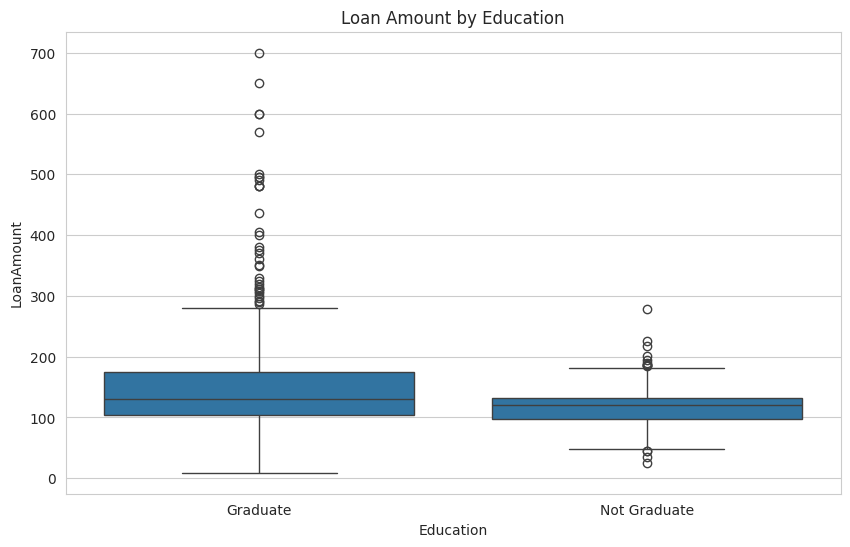

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='LoanAmount', data=df)
plt.title("Loan Amount by Education")
plt.show()

---

<Figure size 800x500 with 0 Axes>

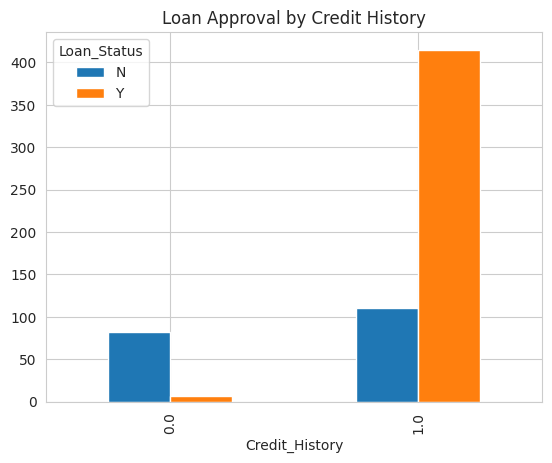

In [22]:
plt.figure(figsize=(8,5))
pd.crosstab(df['Credit_History'], df['Loan_Status']).plot(kind='bar')
plt.title('Loan Approval by Credit History')
plt.show()

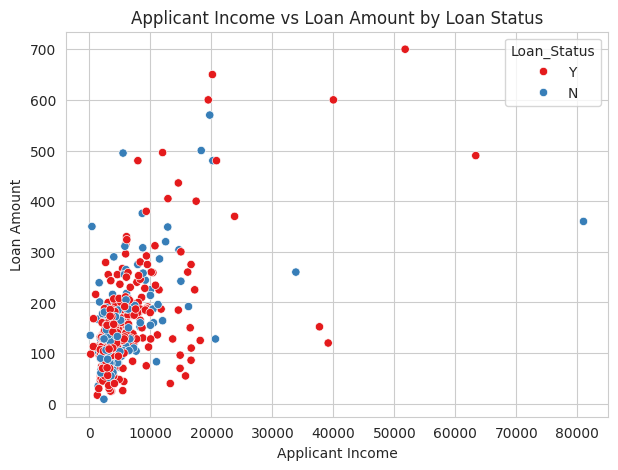

In [26]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df, palette='Set1')
plt.title('Applicant Income vs Loan Amount by Loan Status')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

---

## 11. Predict Loan Eligibility with Business Logic
We'll create a rule-based eligibility predictor.
- Credit History must be 1
- Total Income should be above 2500
- Loan Amount must be below 200

In [19]:
def check_eligibility(row):
    if row['Credit_History'] == 1 and row['TotalIncome'] > 2500 and row['LoanAmount'] < 200:
        return 'Eligible'
    else:
        return 'Not Eligible'

In [20]:
df['Eligibility_Prediction'] = df.apply(check_eligibility, axis=1)

In [21]:
df[['Loan_ID', 'TotalIncome', 'Credit_History', 'LoanAmount', 'Eligibility_Prediction']].head()

,Loan_ID,TotalIncome,Credit_History,LoanAmount,Eligibility_Prediction
0,LP001002,5849.0,1.0,128.0,Eligible
1,LP001003,6091.0,1.0,128.0,Eligible
2,LP001005,3000.0,1.0,66.0,Eligible
3,LP001006,4941.0,1.0,120.0,Eligible
4,LP001008,6000.0,1.0,141.0,Eligible


## 12. Save Final Output
Export the final DataFrame to a CSV file.

In [27]:
df.to_csv("LoanEligibility_Output.csv", index=False)